In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter

#in folder kddcup.data there is file named kddcup.data import that as pd dataframe 

df = pd.read_csv('kddcup.data_10_percent/kddcup.data_10_percent', header=None)

In [2]:
'''
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: continuous.
dst_host_same_srv_rate: continuous.
dst_host_diff_srv_rate: continuous.
dst_host_same_src_port_rate: continuous.
dst_host_srv_diff_host_rate: continuous.
dst_host_serror_rate: continuous.
dst_host_srv_serror_rate: continuous.
dst_host_rerror_rate: continuous.
dst_host_srv_rerror_rate: continuous.
'''


# Adding column names to dataset

df.columns = [
    'duration',
    'protocol_type',
    'service',
    'flag',
    'src_bytes',
    'dst_bytes',
    'land',
    'wrong_fragment',
    'urgent',
    'hot',
    'num_failed_logins',
    'logged_in',
    'num_compromised',
    'root_shell',
    'su_attempted',
    'num_root',
    'num_file_creations',
    'num_shells',
    'num_access_files',
    'num_outbound_cmds',
    'is_host_login',
    'is_guest_login',
    'count',
    'srv_count',
    'serror_rate',
    'srv_serror_rate',
    'rerror_rate',
    'srv_rerror_rate',
    'same_srv_rate',
    'diff_srv_rate',
    'srv_diff_host_rate',
    'dst_host_count',
    'dst_host_srv_count',
    'dst_host_same_srv_rate',
    'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate',
    'dst_host_srv_diff_host_rate',
    'dst_host_serror_rate',
    'dst_host_srv_serror_rate',
    'dst_host_rerror_rate',
    'dst_host_srv_rerror_rate',
    'outcome'
]



In [4]:
#check the first 5 rows of the dataframe
print(df.head())

#check the shape of the dataframe
print(df.shape)

#check the info of the dataframe
print(df.info())

#check the description of the dataframe
print(df.describe())

#check the unique values of the dataframe
print(df.nunique())

#check the null values of the dataframe
print(df.isnull().sum())

#check the value counts of the dataframe
print(df['outcome'].value_counts())


   duration protocol_type service flag  src_bytes  dst_bytes  land  \
0         0           tcp    http   SF        181       5450     0   
1         0           tcp    http   SF        239        486     0   
2         0           tcp    http   SF        235       1337     0   
3         0           tcp    http   SF        219       1337     0   
4         0           tcp    http   SF        217       2032     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                   9   
1               0       0    0  ...                  19   
2               0       0    0  ...                  29   
3               0       0    0  ...                  39   
4               0       0    0  ...                  49   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                     1.0                     0.0   
1                     1.0                     0.0   
2                     1.0                     0.0   
3           

# **Data Preprocessing**

1. Data has no missing data.
2. Heavy class imbalance is handeled by the help of @parthrastogicoder pls complete

In [7]:
dos_attacks = ['smurf.', 'neptune.', 'back.', 'teardrop.', 'pod.', 'land.']
r2l_attacks = ['warezclient.', 'guess_passwd.', 'imap.', 'warezmaster.', 'ftp_write.', 'phf.', 'spy.', 'multihop.']
u2r_attacks = ['buffer_overflow.', 'loadmodule.', 'rootkit.', 'perl.']
probe_attacks = ['satan.', 'ipsweep.', 'portsweep.', 'nmap.']

# Categorize the attack types into the 5 classes
def categorize_attack_type(label):
    if label in dos_attacks:
        return 'DOS'
    elif label in r2l_attacks:
        return 'R2L'
    elif label in u2r_attacks:
        return 'U2R'
    elif label in probe_attacks:
        return 'probing'
    else:
        return 'normal'
    
df['outcome'] = df['outcome'].apply(categorize_attack_type)


In [9]:
print(df['outcome'].value_counts())

outcome
DOS        391458
normal      97278
probing      4107
R2L          1126
U2R            52
Name: count, dtype: int64


In [14]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from imblearn.combine import SMOTEENN
# from collections import Counter
# 
# Assuming df is your dataset and categorize_attack_type is a function that categorizes your target variable
# df[41] = df[41].apply(categorize_attack_type)

# Split the dataset into features (X) and target (Y)
X = df.drop('outcome', axis=1)  # X is the feature matrix
Y = df['outcome']  # Y is the target variable

# Split into training and test sets (80% training, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# One-hot encode the categorical variables in X
encoder_X1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_1 = encoder_X1.fit_transform(X_train['protocol_type'].values.reshape(-1, 1))
X_test_1 = encoder_X1.transform(X_test['protocol_type'].values.reshape(-1, 1))
encoder_X2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_2 = encoder_X2.fit_transform(X_train['service'].values.reshape(-1, 1))
X_test_2 = encoder_X2.transform(X_test['service'].values.reshape(-1, 1))
encoder_X3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_3 = encoder_X3.fit_transform(X_train['flag'].values.reshape(-1, 1))
X_test_3 = encoder_X3.transform(X_test['flag'].values.reshape(-1, 1))
# Initialize OneHotEncoder for Y
encoder_Y = OneHotEncoder(sparse_output=False)

# Fit and transform Y_train and Y_test
Y_train_encoded = encoder_Y.fit_transform(Y_train.values.reshape(-1, 1))
Y_test_encoded = encoder_Y.transform(Y_test.values.reshape(-1, 1))
# join the encoded features and remaining features
X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train.iloc[:, 4:].values), axis=1)
# Convert X_train to numpy array for resampling
# X_train_np = X_train.values
# Y_train_np = Y_train.values

# Define the hybrid sampler (SMOTE + ENN)
smote_enn = SMOTEENN(sampling_strategy='auto', random_state=42)

# Apply SMOTEENN to the training set
X_train_resampled, Y_train_resampled = smote_enn.fit_resample(X_train, Y_train)

# One-hot encode Y after resampling
Y_train_resampled_encoded = encoder_Y.fit_transform(Y_train_resampled.reshape(-1, 1))

# Check the distribution after resampling
print('Resampled Y distribution:', Counter(Y_train_resampled))

# Created a new csv to avoid repetetive compute of SMOTEENN

# Convert the resampled data back to a DataFrame
X_train_resampled_df = pd.DataFrame(X_train_resampled, columns=X.columns)
Y_train_resampled_df = pd.DataFrame(Y_train_resampled, columns=['outcome'])

# Combine the features and target into one DataFrame
resampled_df = pd.concat([X_train_resampled_df, Y_train_resampled_df], axis=1)

# Save the resampled DataFrame to a new CSV file
resampled_df.to_csv('resampled_kddcup.csv', index=False)

# The encoded variables are ready for training your machine learning model


KeyboardInterrupt: 

## **Visualizing Data**

In [5]:
for col in X.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

    sns.boxplot(x=X[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

NameError: name 'X' is not defined

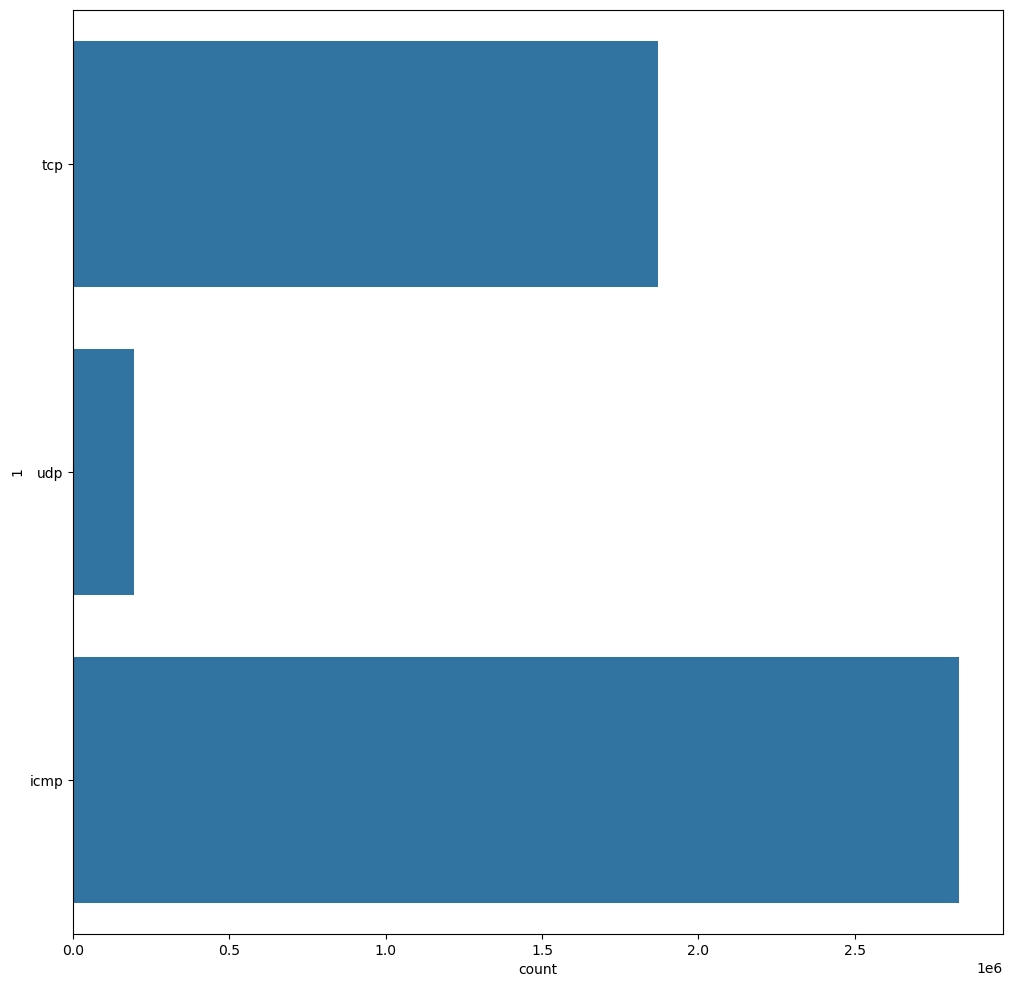

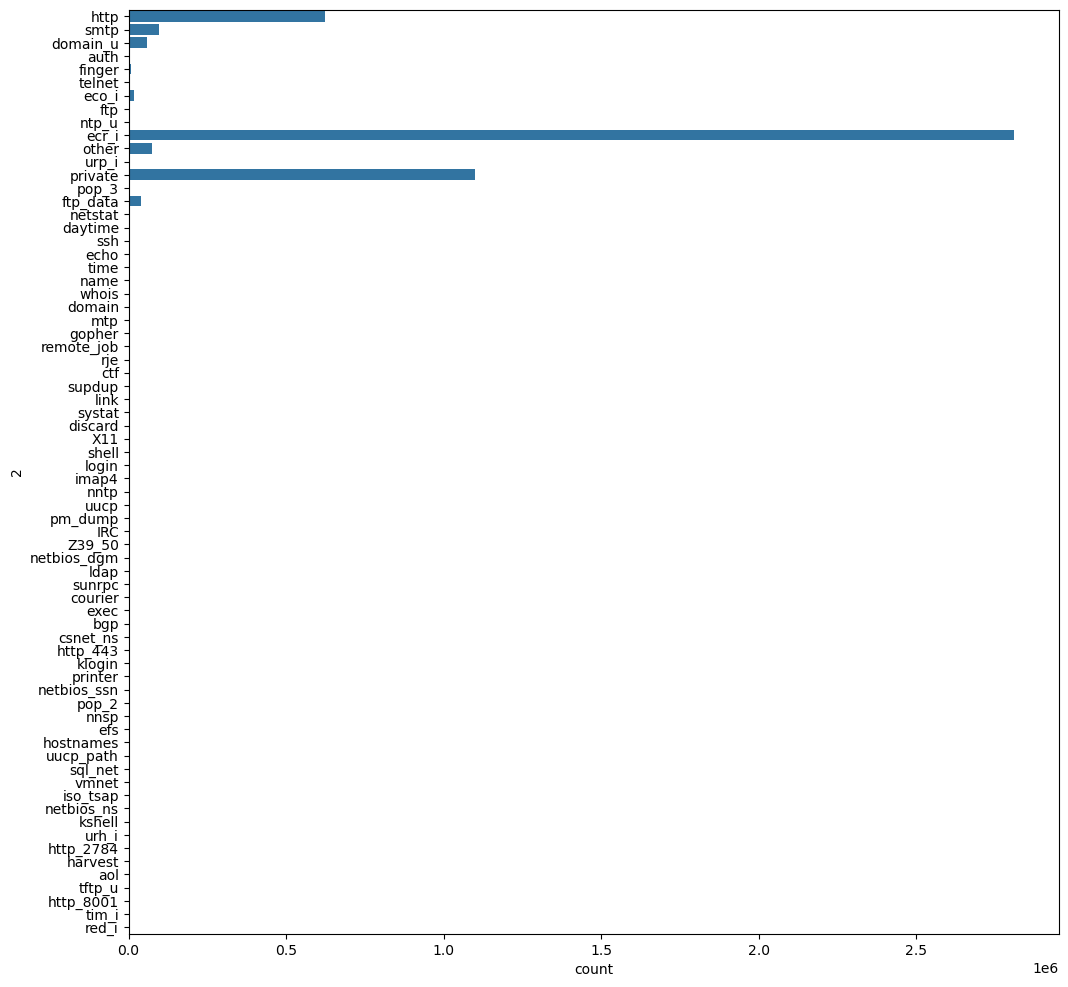

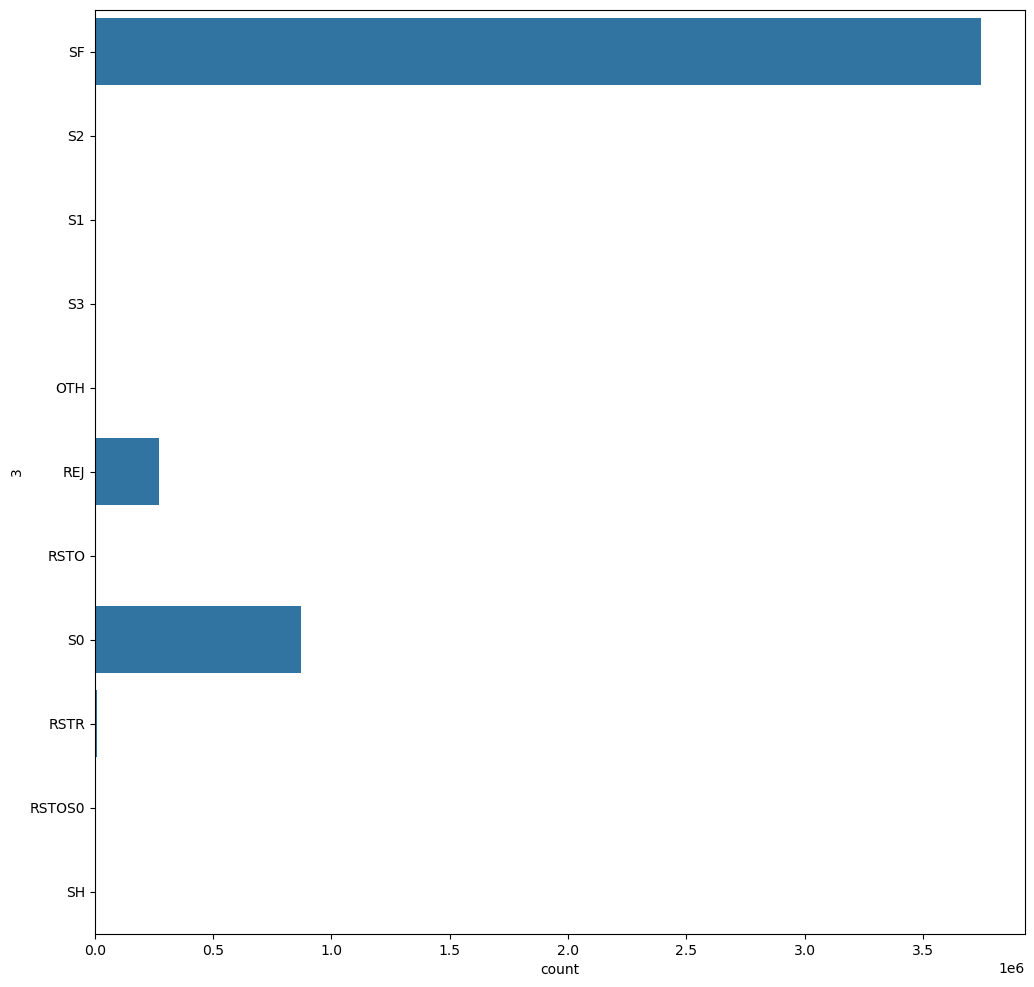

In [ ]:
#PLOT SAME FOR ALL CATAGORICAL VARIABLES 
#plot the value counts of the dataframe
plt.figure(figsize=(12,12))
sns.countplot(df[1])
plt.show()

#plot the value counts of the dataframe
plt.figure(figsize=(12,12))
sns.countplot(df[2])
plt.show()

#plot the value counts of the dataframe
plt.figure(figsize=(12,12))
sns.countplot(df[3])
plt.show()

# #plot the value counts of the dataframe
# plt.figure(figsize=(12,6))


In [ ]:
#not working 
X = df.drop(41, axis=1)  # X is the feature matrix
Y = df[41]  # Y is the target variable

# One hot encode the categorical variables (assumed to be in columns 1, 2, and 3)
# from sklearn.utils import resample
# import pandas as pd


# # Combine features and target into one DataFrame
# df_train = pd.concat([X, Y], axis=1)

# # Separate majority and minority classes (assuming the most common and rare classes)
# majority_class = df_train[df_train[41] == df_train[41].value_counts().idxmax()]  # Largest class
# minority_classes = df_train[df_train[41] != df_train[41].value_counts().idxmax()]  # Rest of the classes

# # Upsample minority classes to match the majority class size
# minority_upsampled = resample(minority_classes,
#                               replace=True,  # Sample with replacement
#                               n_samples=len(majority_class),  # Match number in majority class
#                               random_state=42)  # Set a seed for reproducibility

# # Combine the majority class with the upsampled minority classes
# df_upsampled = pd.concat([majority_class, minority_upsampled])

# # Split the features and labels back
# X_train_resampled = df_upsampled.drop(41, axis=1)
# y_train_resampled = df_upsampled[41]

# print(X_train_resampled.shape, y_train_resampled.shape)
# print(y_train_resampled.value_counts())


(5615772, 41) (5615772,)
smurf.              2807886
neptune.            1439607
normal.             1306937
satan.                21266
ipsweep.              16755
portsweep.            13904
nmap.                  3117
back.                  3051
teardrop.              1347
warezclient.           1338
pod.                    331
guess_passwd.            56
buffer_overflow.         47
land.                    36
imap.                    20
warezmaster.             17
loadmodule.              16
multihop.                12
rootkit.                 11
ftp_write.                6
perl.                     6
phf.                      4
spy.                      2
Name: 41, dtype: int64


        0         1         2         3         4         5         6    \
0 -0.066833 -0.001720  0.068188 -0.002391 -0.015139 -0.001103 -0.026521   
1 -0.066833 -0.001777  0.005325 -0.002391 -0.015139 -0.001103 -0.026521   
2 -0.066833 -0.001698  0.000208 -0.002391 -0.015139 -0.001103 -0.026521   
3 -0.066833 -0.001701  0.001455 -0.002391 -0.015139 -0.001103 -0.026521   
4 -0.066833 -0.001695 -0.000942 -0.002391 -0.015139 -0.001103 -0.026521   

        7         8         9    ...       112       113       114       115  \
0 -0.004391  2.442792 -0.002097  ... -0.240993 -0.033048 -0.004991 -0.040683   
1 -0.004391  2.442792 -0.002097  ... -0.240993 -0.033048 -0.004991 -0.040683   
2 -0.004391  2.442792 -0.002097  ... -0.240993 -0.033048 -0.004991 -0.040683   
3 -0.004391  2.442792 -0.002097  ... -0.240993 -0.033048 -0.004991 -0.040683   
4 -0.004391  2.442792 -0.002097  ... -0.240993 -0.033048 -0.004991 -0.040683   

        116       117       118       119       120       121  
0 -0

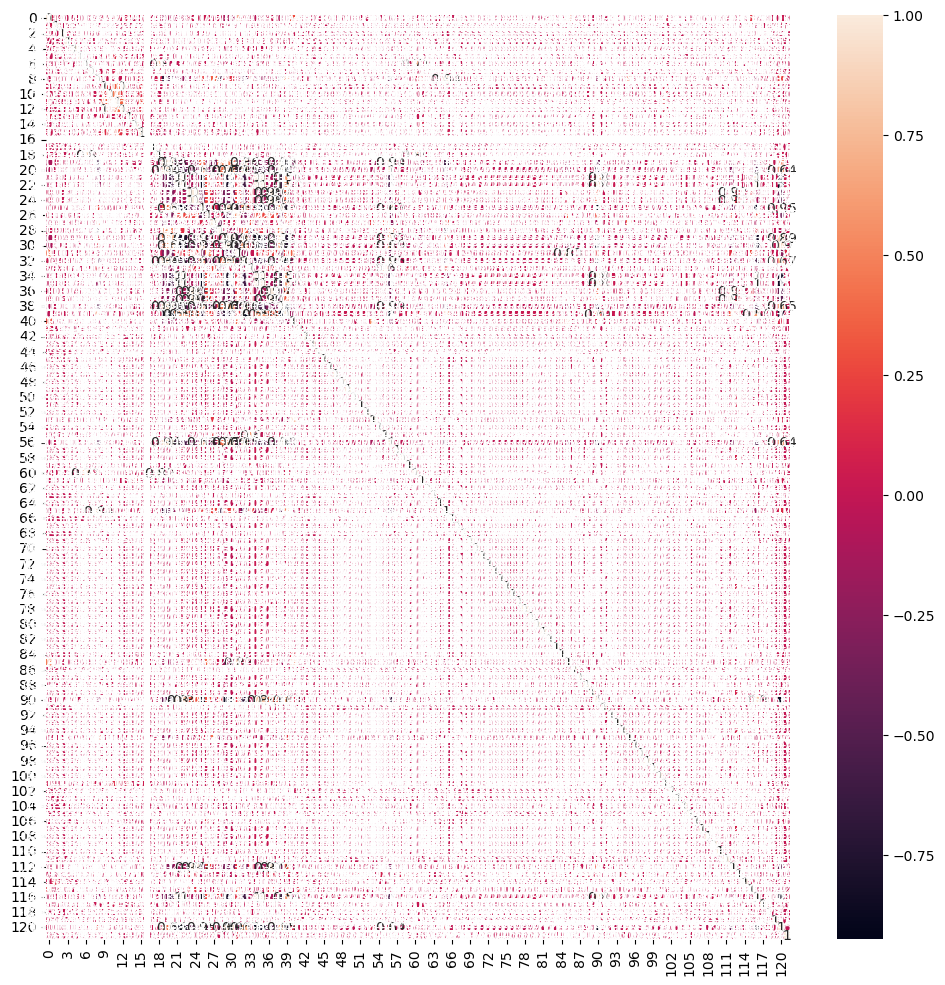

In [ ]:
#make corelation heatmap . boxplots after standardizing and violin plots
# give string column name to all 
# give string column name to all columns instead of int
X.columns = X.columns.astype(str)


#standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

#convert the data to dataframe

X = pd.DataFrame(X)

#check the first 5 rows of the dataframe

print(X.head())

#check the shape of the dataframe
print(X.shape)

#make corelation heatmap
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(), annot=True)
plt.show()

#combined boxplots after standardizing

plt.figure(figsize=(12,6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.show()


#violin plots
plt.figure(figsize=(12,6))
sns.violinplot(data=X)
plt.xticks(rotation=90)
plt.show()




In [ ]:


# Now X_train_resampled and y_train_resampled contain the balanced dataset

In [ ]:
# As provided by, KDDCUP99 website

# duration: continuous.
# protocol_type: symbolic.
# service: symbolic.
# flag: symbolic.
# src_bytes: continuous.
# dst_bytes: continuous.
# land: symbolic.
# wrong_fragment: continuous.
# urgent: continuous.
# hot: continuous.
# num_failed_logins: continuous.
# logged_in: symbolic.
# num_compromised: continuous.
# root_shell: continuous.
# su_attempted: continuous.
# num_root: continuous.
# num_file_creations: continuous.
# num_shells: continuous.
# num_access_files: continuous.
# num_outbound_cmds: continuous.
# is_host_login: symbolic.
# is_guest_login: symbolic.
# count: continuous.
# srv_count: continuous.
# serror_rate: continuous.
# srv_serror_rate: continuous.
# rerror_rate: continuous.
# srv_rerror_rate: continuous.
# same_srv_rate: continuous.
# diff_srv_rate: continuous.
# srv_diff_host_rate: continuous.
# dst_host_count: continuous.
# dst_host_srv_count: continuous.
# dst_host_same_srv_rate: continuous.
# dst_host_diff_srv_rate: continuous.
# dst_host_same_src_port_rate: continuous.
# dst_host_srv_diff_host_rate: continuous.
# dst_host_serror_rate: continuous.
# dst_host_srv_serror_rate: continuous.
# dst_host_rerror_rate: continuous.
# dst_host_srv_rerror_rate: continuous.